<a href="https://colab.research.google.com/github/kriskirla/AllProjects/blob/master/Algotrading/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program will predict the stock for a specific day using ML

In [ ]:
!pip install yfinance

In [ ]:
# Import libaries
from sklearn.svm import SVR
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [75]:
ticker = "MSFT";

# Get data from yahoo finance
df = yf.download(ticker, start="2020-01-01", end="2020-01-31")#end=dt.today().strftime('%Y-%m-%d'))

[*********************100%***********************]  1 of 1 completed


In [76]:
# Get the last row of data to test the correctness
actual_price = df.tail(1)
actual_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-30,174.050003,174.050003,170.789993,172.779999,170.968826,51597500


In [77]:
# Get the data except for the last row
df = df.head(len(df) - 1)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,158.936279,22622100
2020-01-03,158.320007,159.949997,158.059998,158.619995,156.957260,21116200
2020-01-06,157.080002,159.100006,156.509995,159.029999,157.362961,20813700
2020-01-07,159.320007,159.669998,157.320007,157.580002,155.928177,21634100
2020-01-08,158.929993,160.800003,157.949997,160.089996,158.411835,27746500
2020-01-09,161.839996,162.220001,161.029999,162.089996,160.390869,21385000
2020-01-10,162.820007,163.220001,161.179993,161.339996,159.648727,20725900
2020-01-13,161.759995,163.309998,161.259995,163.279999,161.568405,21626500
2020-01-14,163.389999,163.600006,161.720001,162.130005,160.430450,23477400


In [79]:
# Create independant dataset and dependant dataset
df_days = df.index
df_adj_close = df.loc[:, 'Adj Close']

days = [[i.day] for i in df_days ]
adj_close_price = [float(price) for price in df_adj_close]

In [80]:
# Linear Model
lin_svr = SVR(kernel='linear', C=1000)
lin_svr.fit(days, adj_close_price)
# Polynomial Model
poly_svr = SVR(kernel='poly', C=1000, degree=2)
poly_svr.fit(days, adj_close_price)
# Radial Basis Function Model
rbf_svr = SVR(kernel='rbf', C=1000, gamma=0.85)
rbf_svr.fit(days, adj_close_price)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

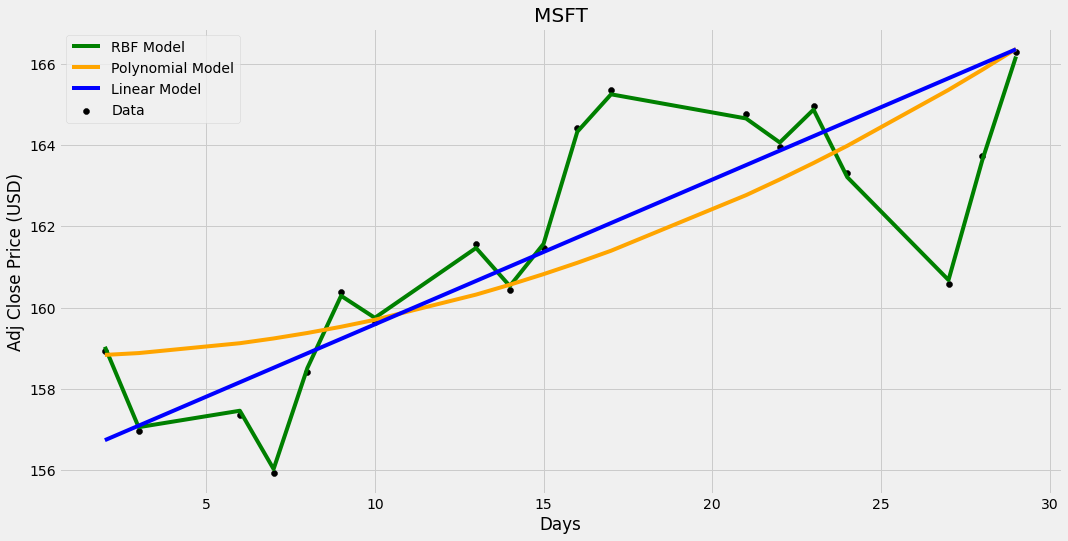

In [81]:
# Plot the models
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_price, color='black', label='Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='blue', label='Linear Model')
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Adj Close Price (USD)')
plt.legend()
plt.show()

In [82]:
# Show the predicted price for the given day
day = [[30]]

print(f"Predicted price using RBF Model: {rbf_svr.predict(day)}")
print(f"Predicted price using Polynomial Model: {poly_svr.predict(day)}")
print(f"Predicted price using Linear Model: {lin_svr.predict(day)}")
print(f"Actual Price: {actual_price.iloc[0]['Adj Close']}")

Predicted price using RBF Model: [163.40752629]
Predicted price using Polynomial Model: [166.89581879]
Predicted price using Linear Model: [166.71286185]
Actual Price: 170.9688262939453
